In [1]:
import serial
from ECi import ECipot
pot = ECipot()
from ec4py import EC_Data
import matplotlib.pyplot as plt
from ec4py import LSV_Data,LSV_Datas


In [2]:
pot.connect("COM5")




@ ---------------------------------------------------------
@ Initialisation of Potentiostat Shield v1.6
@
@ Library version1.1.2
CELL  0
CELL 0
vGND = 2518mV vs GND
CELL  0
CELL 0
RANGE INDEX: 0
IE  -5
IE -5 - IRange: 10uA
CMODE  1
CMODE 1 - E
@---------------------------------------------------------

@
@---------------------------------------------------------
@ Initialisation of Potentiostat Done
Ini Done
@ ---------------------------------------------------------
@ Time(ms)	E(mV)	i(A)
	6070	-865.00	929.00E-8
	6172	-1622.38	1629.57E-8


Serial<id=0x1602a994460, open=True>(port='COM5', baudrate=115200, bytesize=8, parity='N', stopbits=1, timeout=1, xonxoff=False, rtscts=False, dsrdtr=False)

In [3]:
pot.cell_on()

In [4]:
print(pot.cell)

0


In [5]:
pot.cell_off()
pot.reads()

'CELL 1'

b'step 1000 2000 500 1000 0 2000\n'

DATA READ: STEP 1000 2000 500 1000 0 2000
1000 2000 500 1000 0 2000 10
@Step0	S: 1000	t: 2000
@Step1	S: 500	t: 3000
@Step2	S: 0	t: 5000
Start Step

Step: 1, SET= 1000: -------------------
Step: 2, SET= 500: ----------
Step: 3, SET= 0: ------------------

(<matplotlib.lines.Line2D at 0x1604bc25f50>,
 <Axes: xlabel='t ( s)', ylabel='E (V)'>)

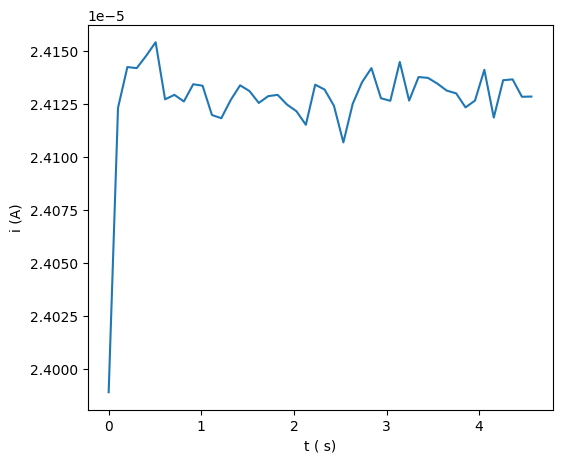

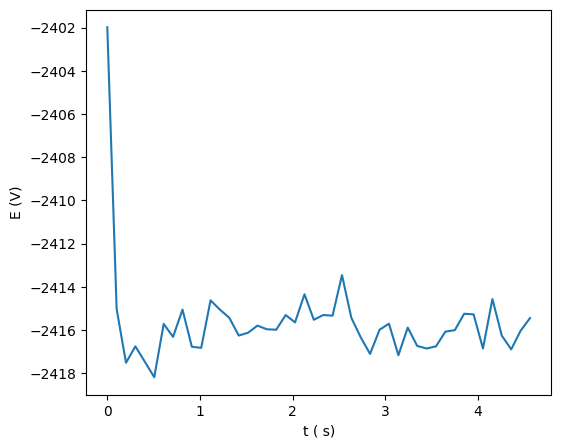

In [6]:
#data = line.split("\t")
pot.read()
stdata =pot.steps(1000,2000,500,1000,0,2000)
stdata.plot()
stdata.plot(y_channel = "E")

In [7]:
#LSV, ini = pot.ramp(500,1000,0,100,2)
#LSV, ini = pot.ramp(500,1000,0,100,1)
LSV, ini, data_lsv = pot.ramp(500,1000,0,100,2)


b'ramp 500 1000 0 100 2\n'
INI: xxxxxxxxxxxxxxxxxxxx indexData 20
start
change to pos0: -------------------------------------------------
change to neg1: ----------------------------------------------------------------------------------------------------
change to pos2: -----------------------------------

In [ ]:
data_lsv.plot()

In [ ]:
data_lsv[0].plot()
data_lsv[1].plot()

In [ ]:
pot.read()

In [10]:
pot.close()

In [ ]:
aa =b'CELL 1 - E\r\n'
print(aa[0:4] == b"CELL")

In [ ]:
a=LSV[0][:,0]
print(a)
plt.plot(LSV[0][:,0], LSV[0][:,2])
plt.show()

In [13]:
ab = EC_Data()
ab.Time= LSV[0][:,0]
ab.E= LSV[0][:,1]
ab.i= LSV[0][:,2]

In [ ]:
ab.plot(x_channel="E",y_channel="i")